# 像搭积木一样搭神经网络

In [1]:
import math
import random
import numpy as np
import torch

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 一、概述

### 1.2 DataLoader

In [2]:
class DataLoader:
    def __init__(self, data: list, batch_size: int):
        self.i = 0
        self.batch_size = batch_size
        self.batch_num = math.floor(len(data) / batch_size)
        self._data = self.gen_batch(data)

    def gen_batch(self, data):
        lst = []
        s = self.batch_size
        for i in range(self.batch_num):
            start, end = s * i, s * (i + 1)
            X = torch.tensor([e[0] for e in data[start:end]])
            y = torch.tensor([e[1] for e in data[start:end]])
            lst.append((X, y))

        return lst

    def __iter__(self):
        self.i = 0
        return self

    def __next__(self):
        if self.i < len(self._data):
            self.i += 1
            return self._data[self.i - 1]
        else:
            raise StopIteration

假设有二元函数：

$$f(a, b) = \frac{a^2 - b^2}{a^2 + b^2} + \epsilon$$

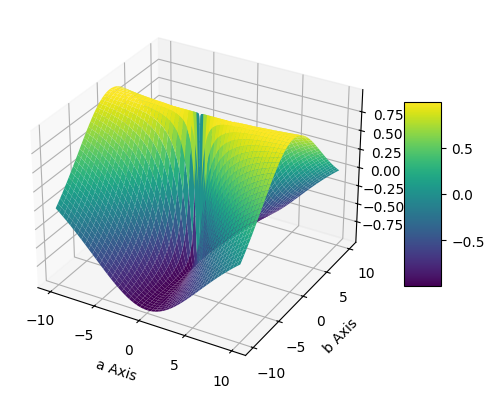

In [3]:
a, b = np.meshgrid(np.linspace(-10, 10, 1000), np.linspace(-10, 10, 1000))
y = np.where((a**2 + b**2) != 0, (a**2 - b**2) / (a**2 + b**2), np.nan)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(a, b, y, cmap='viridis')

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('a Axis')
ax.set_ylabel('b Axis')
ax.set_zlabel('y Axis')
plt.show()

In [4]:
# 构造符合 f(a, b) = \frac{a^2 - b^2}{a^2 + b^2} + \epsilon 函数的样本生成
sample_num, batch_size = 2560, 10
X = [(random.random(), random.random()) for e in range(sample_num)]
y = map(lambda e: ((e[0]**2 - e[1]**2) / (e[0]**2 + e[1]**2)) + (random.random() / 100), X)

raw_data = list(zip(X, y))

In [5]:
# 输出一个批量的数据
for X, y in DataLoader(data=raw_data, batch_size=batch_size):
    print(f'X: {X}')
    print(f'y: {y}')
    break

X: tensor([[0.3726, 0.0904],
        [0.5872, 0.1186],
        [0.7690, 0.8118],
        [0.4371, 0.5416],
        [0.8057, 0.6135],
        [0.2742, 0.4214],
        [0.4303, 0.7228],
        [0.3313, 0.8408],
        [0.6891, 0.1894],
        [0.0936, 0.7606]])
y: tensor([ 0.8981,  0.9304, -0.0468, -0.2018,  0.2661, -0.4044, -0.4737, -0.7235,
         0.8597, -0.9680])


## 二、激活函数

### 2.1 Sigmoid

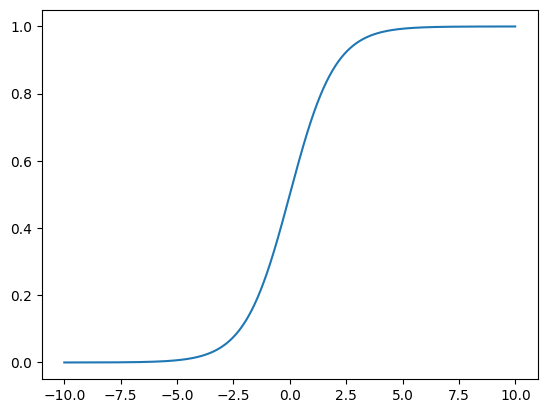

In [6]:
x = np.array([i/100 - 10 for i in range(2000)])
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)

### 2.1 Sigmoid

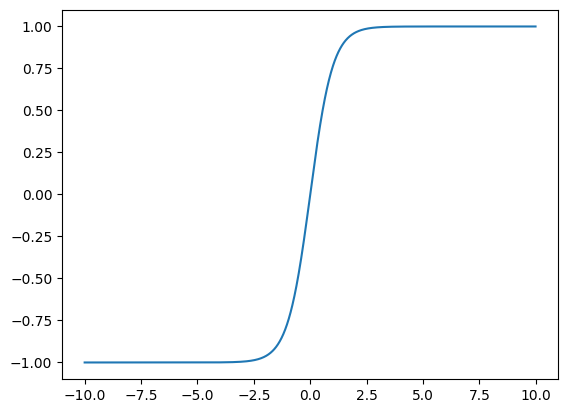

In [7]:
x = np.array([i/100 - 10 for i in range(2000)])
y = (1 - np.exp(-2 * x)) / (1 + np.exp(-2 * x))
plt.plot(x, y)

### 2.3 ReLU

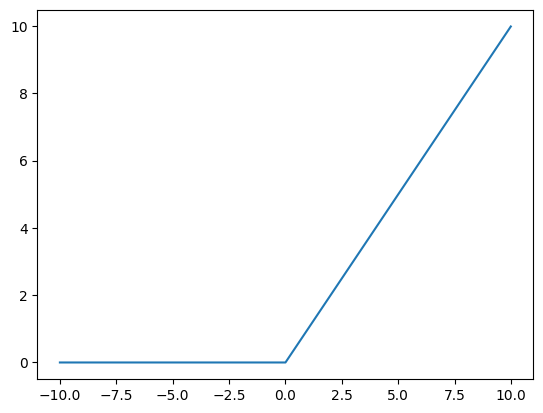

In [8]:
x = [i/100 - 10 for i in range(2000)]
y = [max(e, 0) for e in x]
plt.plot(x, y)